# Ngoc Ha
# STAT 453 - Statistical Learning and Data Science I
# Lab 3

# Data Analysis

In [2]:
library(readxl)
library(dplyr)
library(chron)
library(fitdistrplus)
library(ggplot2)
options(warn = -1)

## 3. Graphical Analysis of discharge for June 1, June 15, and June 30

#### Import data and Overview of data

In [3]:
data <- read_excel('data.xlsx')

In [4]:
str(data)

Classes 'tbl_df', 'tbl' and 'data.frame':	124741 obs. of  4 variables:
 $ Date      : POSIXct, format: "2009-08-07" "2009-08-07" ...
 $ Time      : chr  "00:15:00" "00:30:00" "00:45:00" "01:00:00" ...
 $ DischargeM: num  210 210 215 215 219 219 224 224 224 229 ...
 $ DischargeW: num  365 365 371 371 378 384 384 384 390 390 ...


#### Convert Date and Time to Date and Time format

In [37]:
data$Date <- as.Date(data$Date)

data$Time <- times(data$Time)

head(data)

Date,Time,DischargeM,DischargeW
2009-08-07,00:15:00,210,365
2009-08-07,00:30:00,210,365
2009-08-07,00:45:00,215,371
2009-08-07,01:00:00,215,371
2009-08-07,01:15:00,219,378
2009-08-07,01:30:00,219,384


#### Subset only necessary data

In [6]:
data_0601 = subset(data, format(Date, "%m-%d") == "06-01")

data_0615 = subset(data, format(Date, "%m-%d") == "06-15")

data_0630 = subset(data, format(Date, "%m-%d") == "06-30")

### (3a) Density histogram

#### Mudd Creek

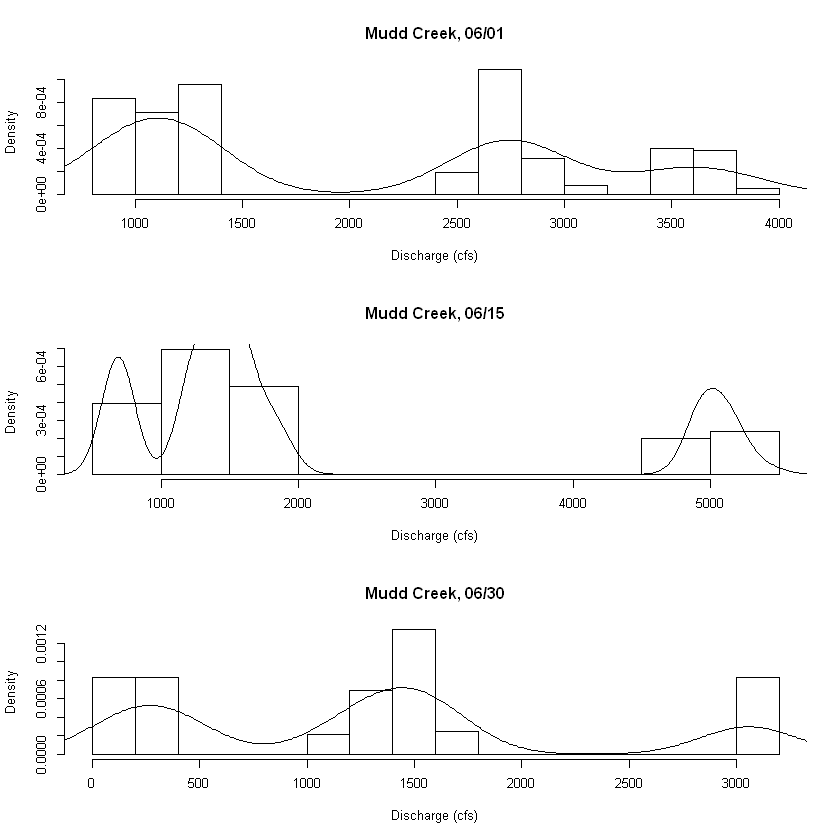

In [7]:
par(mfrow=c(3,1))

hist(data_0601$DischargeM, main = "Mudd Creek, 06/01", xlab = "Discharge (cfs)", prob=T)
lines(density(data_0601$DischargeM), add=T)

hist(data_0615$DischargeM, main = "Mudd Creek, 06/15", xlab = "Discharge (cfs)", prob = T)
lines(density(data_0615$DischargeM), add=T)

hist(data_0630$DischargeM, main = "Mudd Creek, 06/30", xlab = "Discharge (cfs)", prob = T)
lines(density(data_0630$DischargeM), add=T)

In [8]:
'June 1'
summary(data_0601$DischargeM)
'June 15'
summary(data_0615$DischargeM)
'June 30'
summary(data_0630$DischargeM)

[1] "June 1"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    843    1120    1900    2069    2800    3820 

[1] "June 15"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    657    1240    1480    2098    1850    5480 

[1] "June 30"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152     379    1310    1312    1562    3100 

#### Mudd Creek:
##### - On average, discharge during early- to mid-June is bigger than during late-June
##### - There are a lot of gaps in the data, distributed unevenly across these 3 dates
##### - For June 15, Mean discharge is significantly bigger than Median discharge

#### Wise River

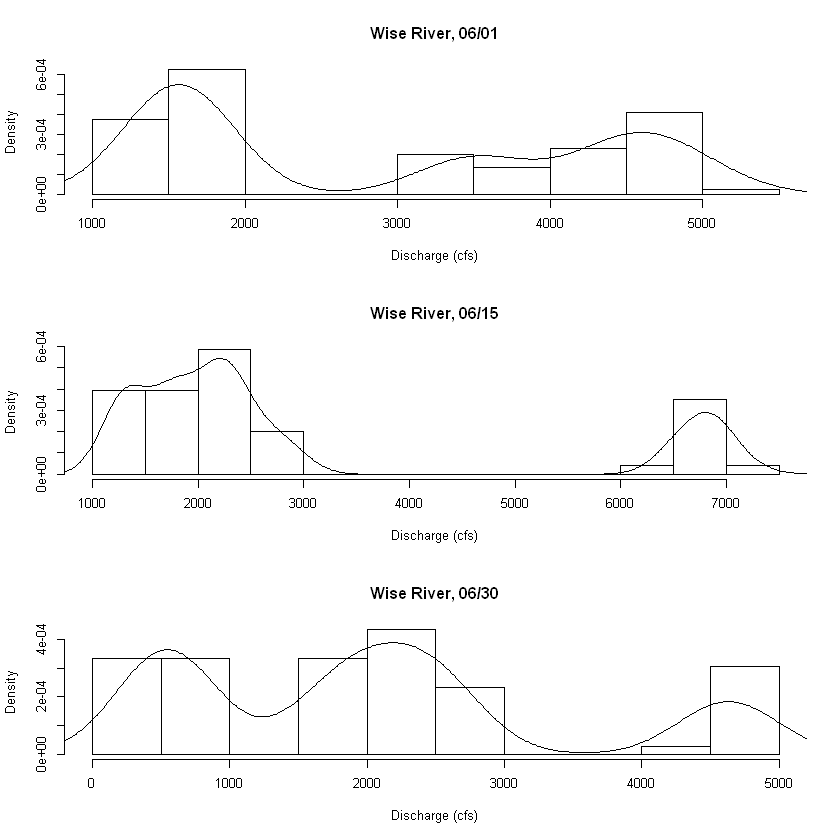

In [9]:
par(mfrow=c(3,1))

hist(data_0601$DischargeW, main = "Wise River, 06/01", xlab = "Discharge (cfs)", prob=T)
lines(density(data_0601$DischargeW), add=T)

hist(data_0615$DischargeW, main = "Wise River, 06/15", xlab = "Discharge (cfs)", prob=T)
lines(density(data_0615$DischargeW), add=T)

hist(data_0630$DischargeW, main = "Wise River, 06/30", xlab = "Discharge (cfs)", prob=T)
lines(density(data_0630$DischargeW), add=T)

In [10]:
'June 1'
summary(data_0601$DischargeW)
'June 15'
summary(data_0615$DischargeW)
'June 30'
summary(data_0630$DischargeW)

[1] "June 1"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1410    1610    2505    2904    4480    5060 

[1] "June 15"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1290    1745    2220    3003    2855    7330 

[1] "June 30"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    429     654    1935    2035    2560    4790 

#### Wise River
##### - On average, discharge during early- to mid-June is bigger than during late-June
##### - There are a lot of gaps in the data, distributed unevenly across these 3 dates
##### - For June 15, Mean discharge is significantly bigger than Median discharge

### (3b) Outlier boxplot

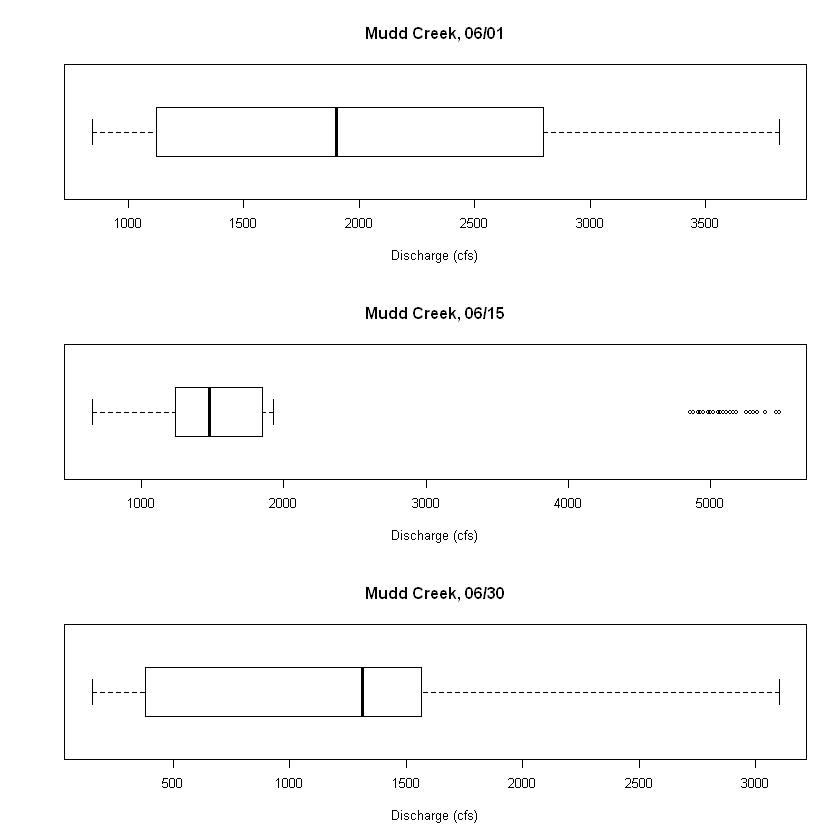

In [11]:
par(mfrow=c(3,1))

boxplot(data_0601$DischargeM, horizontal = T, main = "Mudd Creek, 06/01", xlab = "Discharge (cfs)")

boxplot(data_0615$DischargeM, horizontal = T, main = "Mudd Creek, 06/15", xlab = "Discharge (cfs)")

boxplot(data_0630$DischargeM, horizontal = T, main = "Mudd Creek, 06/30", xlab = "Discharge (cfs)")

#### Mudd Creek
##### There are tens of extreme outliers on June 15. This is why the Mean is significantly bigger than the Median

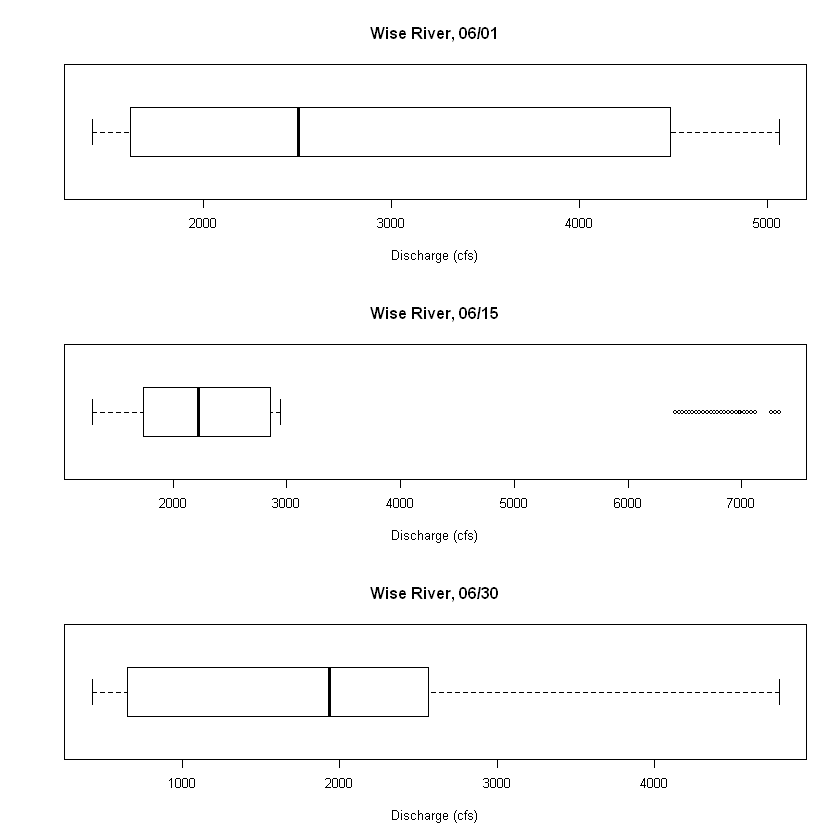

In [12]:
par(mfrow=c(3,1))

boxplot(data_0601$DischargeW, horizontal = T, main = "Wise River, 06/01", xlab = "Discharge (cfs)")

boxplot(data_0615$DischargeW, horizontal = T, main = "Wise River, 06/15", xlab = "Discharge (cfs)")

boxplot(data_0630$DischargeW, horizontal = T, main = "Wise River, 06/30", xlab = "Discharge (cfs)")

#### Wise River
##### There are tens of extreme outliers on June 15. This is why the Mean is significantly bigger than the Median

### (3c) Normal plot

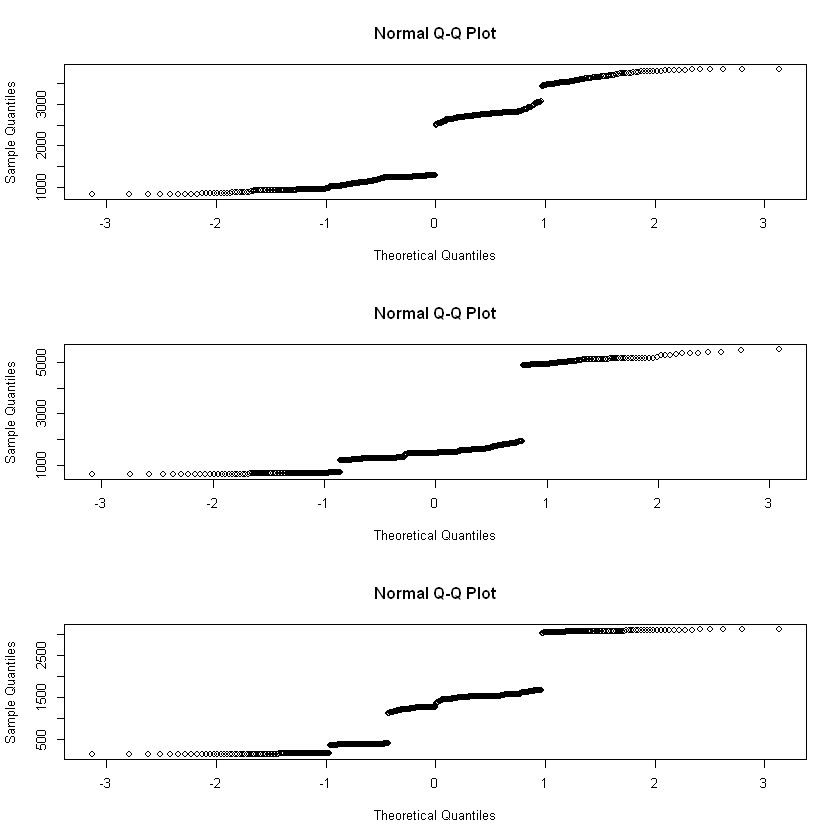

In [13]:
par(mfrow = c(3,1))

qqnorm(data_0601$DischargeM)

qqnorm(data_0615$DischargeM)

qqnorm(data_0630$DischargeM)

#### Mudd Creek
##### - Does not pass fat pencil test => NOT normal.

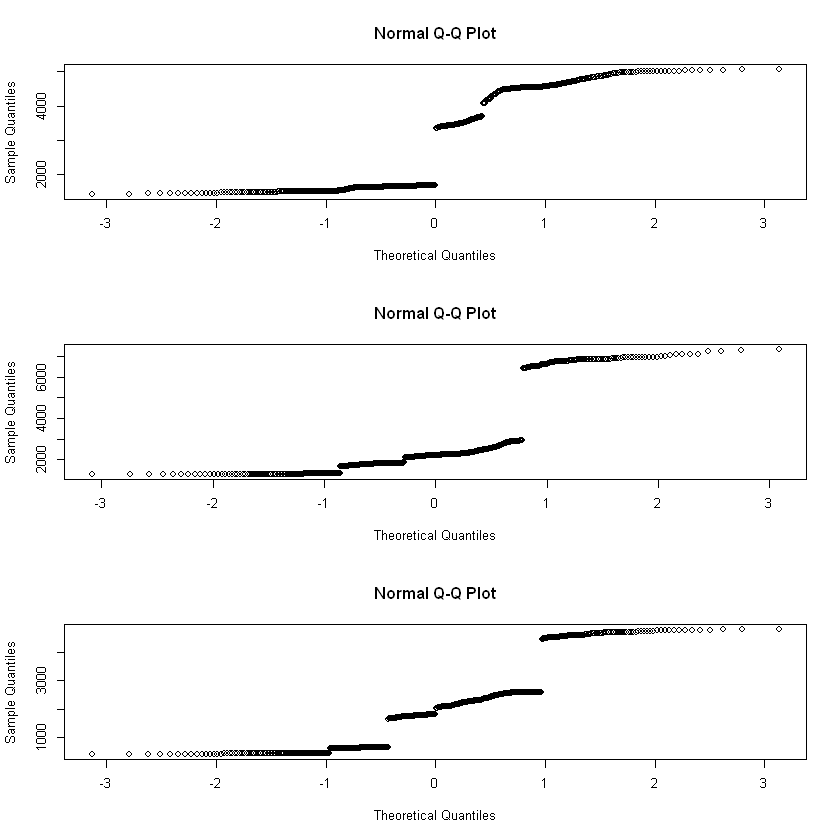

In [14]:
par(mfrow = c(3,1))

qqnorm(data_0601$DischargeW)

qqnorm(data_0615$DischargeW)

qqnorm(data_0630$DischargeW)

#### Wise River
##### Does not pass fat pencil test => NOT normal.

## 4. Basic summary statistics

### Mudd Creek

#### June 1

In [15]:
'6-number summary'
summary(data_0601$DischargeM)
'Trimmed mean'
print(mean(data_0601$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0601$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0601$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    843    1120    1900    2069    2800    3820 

[1] "Trimmed mean"

[1] 2069.095


[1] "Standard Deviation"

[1] 1098.128


[1] "Inter-Quartile range"

[1] 1680


#### June 15

In [16]:
'6-number summary'
summary(data_0615$DischargeM)
'Trimmed mean'
print(mean(data_0615$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0615$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0615$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    657    1240    1480    2098    1850    5480 

[1] "Trimmed mean"

[1] 2097.706


[1] "Standard Deviation"

[1] 1713.836


[1] "Inter-Quartile range"

[1] 610


#### June 30

In [17]:
'6-number summary'
summary(data_0630$DischargeM)
'Trimmed mean'
print(mean(data_0630$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0630$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0630$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152     379    1310    1312    1562    3100 

[1] "Trimmed mean"

[1] 1311.509


[1] "Standard Deviation"

[1] 1046.446


[1] "Inter-Quartile range"

[1] 1183.5


### Wise River

### June 1

In [18]:
'6-number summary'
summary(data_0601$DischargeM)
'Trimmed mean'
print(mean(data_0601$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0601$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0601$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    843    1120    1900    2069    2800    3820 

[1] "Trimmed mean"

[1] 2069.095


[1] "Standard Deviation"

[1] 1098.128


[1] "Inter-Quartile range"

[1] 1680


### June 15

In [19]:
'6-number summary'
summary(data_0615$DischargeM)
'Trimmed mean'
print(mean(data_0615$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0615$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0615$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    657    1240    1480    2098    1850    5480 

[1] "Trimmed mean"

[1] 2097.706


[1] "Standard Deviation"

[1] 1713.836


[1] "Inter-Quartile range"

[1] 610


### June 30

In [20]:
'6-number summary'
summary(data_0630$DischargeM)
'Trimmed mean'
print(mean(data_0630$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0630$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0630$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152     379    1310    1312    1562    3100 

[1] "Trimmed mean"

[1] 1311.509


[1] "Standard Deviation"

[1] 1046.446


[1] "Inter-Quartile range"

[1] 1183.5


## 5 & 6. Density histogram and potential probability model for Wise River's discharge on 04/10/2018

### Load data and Overview of data

In [13]:
data_p5 <- read_excel('Wise_041018.xlsx')

In [14]:
str(data_p5)

Classes 'tbl_df', 'tbl' and 'data.frame':	96 obs. of  3 variables:
 $ Date      : POSIXct, format: "2018-04-10" "2018-04-10" ...
 $ Time      : chr  "00:00:00" "00:15:00" "00:30:00" "00:45:00" ...
 $ DischargeW: num  1480 1450 1430 1410 1390 1370 1360 1350 1350 1350 ...


In [15]:
data_p5$Date = as.Date(data_p5$Date, "%Y-%m-%d")
data_p5$Time = times(data_p5$Time)

In [16]:
str(data_p5)

Classes 'tbl_df', 'tbl' and 'data.frame':	96 obs. of  3 variables:
 $ Date      : Date, format: "2018-04-10" "2018-04-10" ...
 $ Time      : 'times' num  00:00:00 00:15:00 00:30:00 00:45:00 01:00:00 ...
  ..- attr(*, "format")= chr "h:m:s"
 $ DischargeW: num  1480 1450 1430 1410 1390 1370 1360 1350 1350 1350 ...


### Histogram

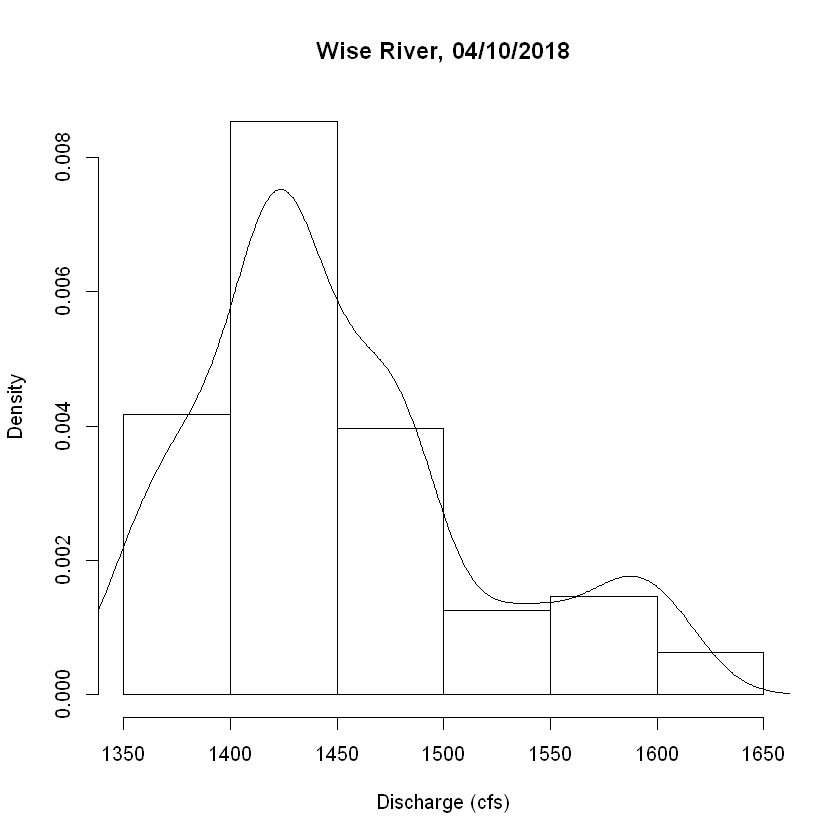

In [17]:
hist(data_p5$DischargeW, prob = T, main = 'Wise River, 04/10/2018', xlab = 'Discharge (cfs)')
lines(density(data_p5$DischargeW), add=T)

#### Histogram has a long tail on the right
#### => A potential probability model that might be used to model Wise River's discharge for 04/10/2017 is a Gamma Model.

## 7. fitdistrplus

#### Try gamma model

In [27]:
fit_gamma <- fitdist(data_p5$DischargeW, "gamma")

In [29]:
fit_gamma

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
         estimate  Std. Error
shape 495.7514678 71.12390037
rate    0.3417788  0.04905825

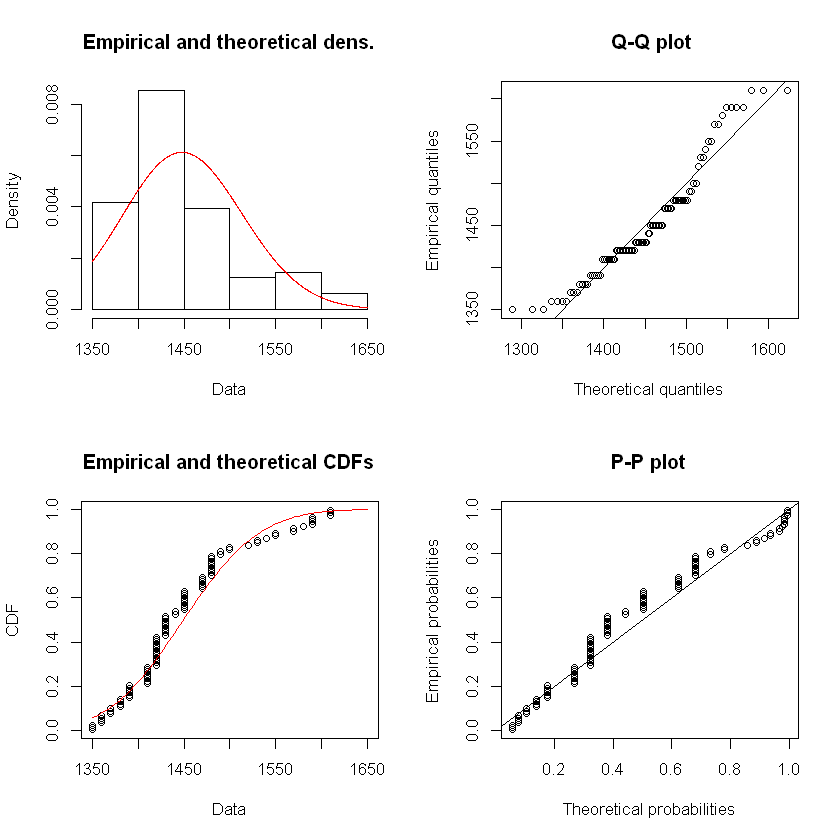

In [30]:
plot(fit_gamma)

## 8. 04/10/2017

##### I don't believe the model for 04/10/2018 can be used for 04/10/2017, because data on a single day does not necessararily resemble data on the same day next year. Only the general trend over a relatively long period of time should stay similar.

In [38]:
data_p8 = subset(data, Date == "2017-04-10")

In [39]:
str(data_p8)

Classes 'tbl_df', 'tbl' and 'data.frame':	96 obs. of  4 variables:
 $ Date      : Date, format: "2017-04-10" "2017-04-10" ...
 $ Time      : 'times' num  00:00:00 00:15:00 00:30:00 00:45:00 01:00:00 ...
  ..- attr(*, "format")= chr "h:m:s"
 $ DischargeM: num  886 886 886 886 875 875 875 875 875 864 ...
 $ DischargeW: num  1320 1320 1320 1320 1310 1310 1310 1310 1300 1310 ...


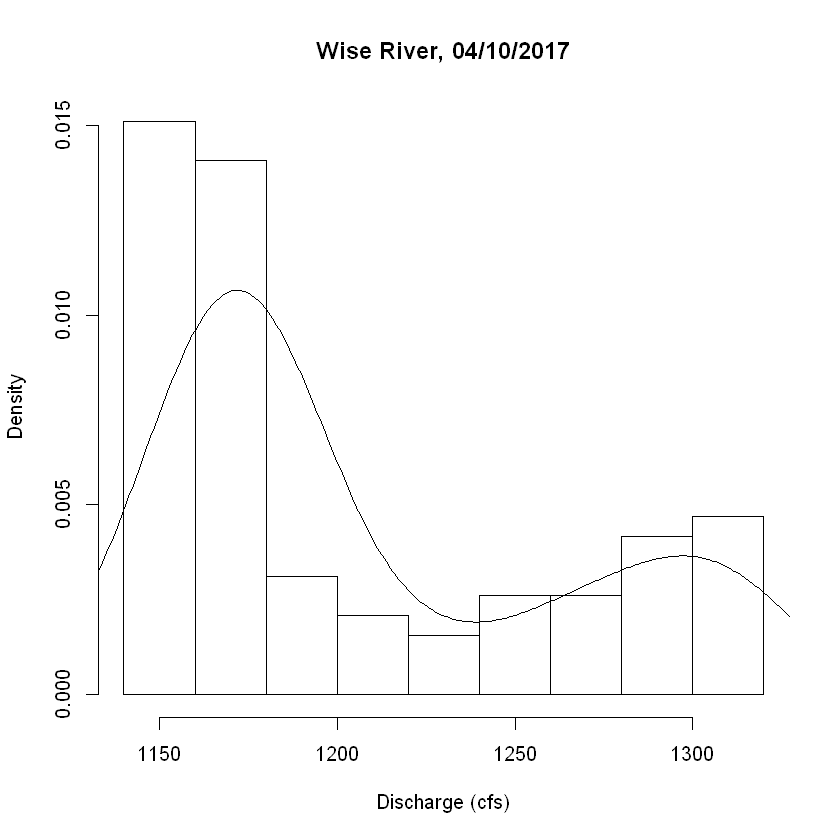

In [40]:
hist(data_p8$DischargeW, prob = T, main = 'Wise River, 04/10/2017', xlab = 'Discharge (cfs)')
lines(density(data_p8$DischargeW), add=T)

##### The distribution for 04/10/2017 looks like a Bimodal distribution.

## 9. DischargeM and DischargeW

### (9a) Smoothed Scatterplot

#### Loess

In [30]:
data_loess <- loess(data$DischargeM ~ data$DischargeW)

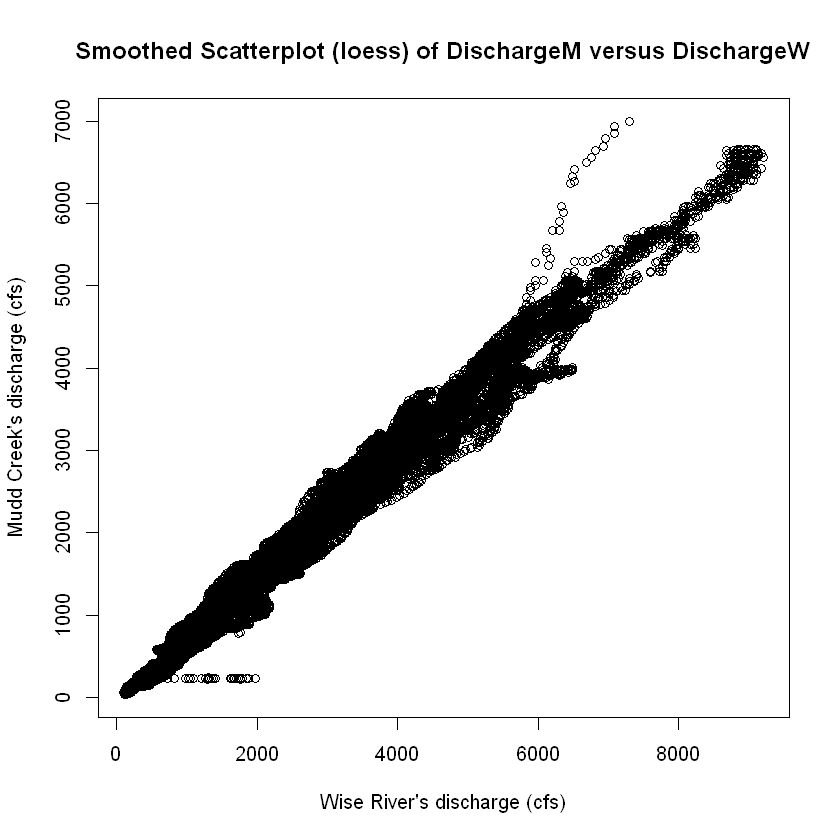

In [34]:
plot(data_loess, xlab = "Wise River's discharge (cfs)",
     ylab = "Mudd Creek's discharge (cfs)",
     main = "Smoothed Scatterplot (loess) of DischargeM versus DischargeW"
    )

### (9b) Correlation

In [42]:
cor(data$DischargeW, data$DischargeM)

[1] 0.9947675

### (9c) hexbin plot

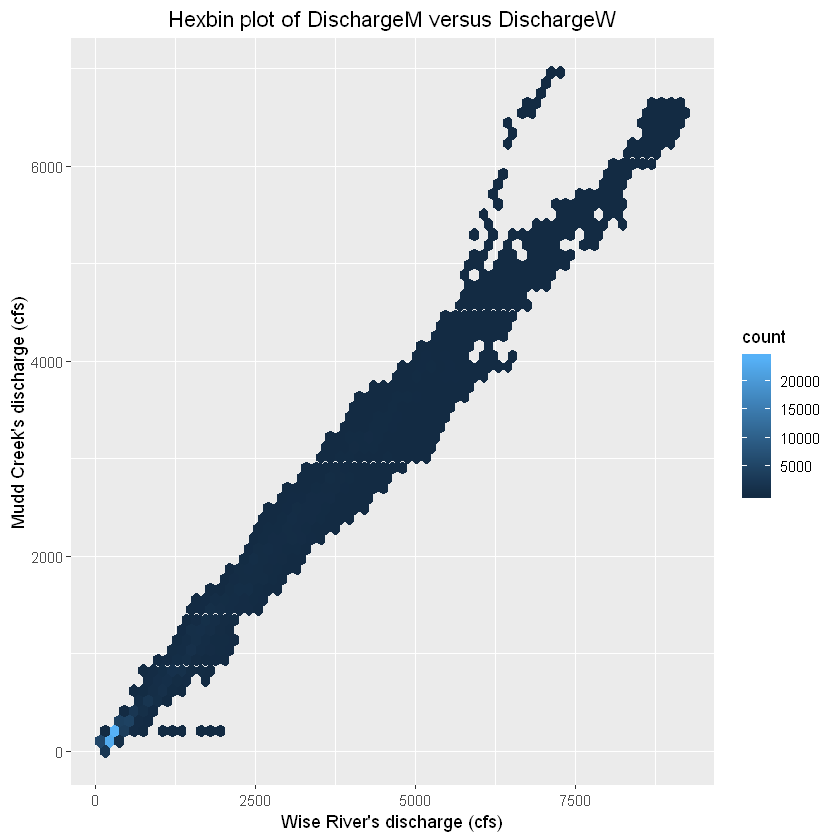

In [65]:
d <- ggplot(data, aes(data$DischargeW, data$DischargeM))
d + geom_hex(binwidth = c(150, 120)) +
xlab("Wise River's discharge (cfs)") +
ylab("Mudd Creek's discharge (cfs)") +
ggtitle("Hexbin plot of DischargeM versus DischargeW") + theme(plot.title = element_text(hjust = 0.5))

### (9d) Least squares

#### Find least squares line

In [85]:
leastSquares <- lsfit(data$DischargeW, data$DischargeM)
ls.print(leastSquares)

Residual Standard Error=112.6926
R-Square=0.9896
F-statistic (df=1, 124739)=11826268
p-value=0

          Estimate Std.Err   t-value Pr(>|t|)
Intercept -36.7770  0.4175  -88.0899        0
X           0.7424  0.0002 3438.9341        0




#### Plot

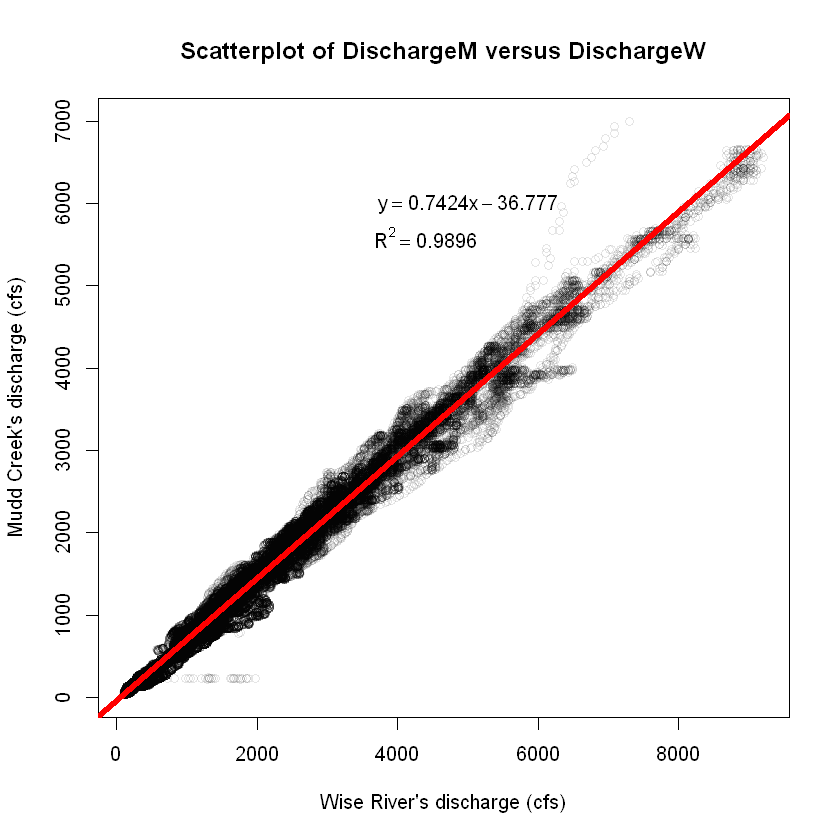

In [99]:
plot(data$DischargeM ~ data$DischargeW, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1),
     xlab = "Wise River's discharge (cfs)",
     ylab = "Mudd Creek's discharge (cfs)",
     main = "Scatterplot of DischargeM versus DischargeW")
abline(reg = leastSquares, col = "red", lwd = 5)
text(5000, 6000, expression(y == 0.7424 * x - 36.777))
text(4400, 5600, expression(R^2 == 0.9896))

##### When discharge at Wise River is 4000 cfs, discharge at Mudd Creek is 0.7424*4000 - 36.777 = _2932_ (cfs)

### (9e) Plot by month

#### Create "Month" column for color code

In [105]:
data$Month <- format(data$Date, "%m")

#### Plot

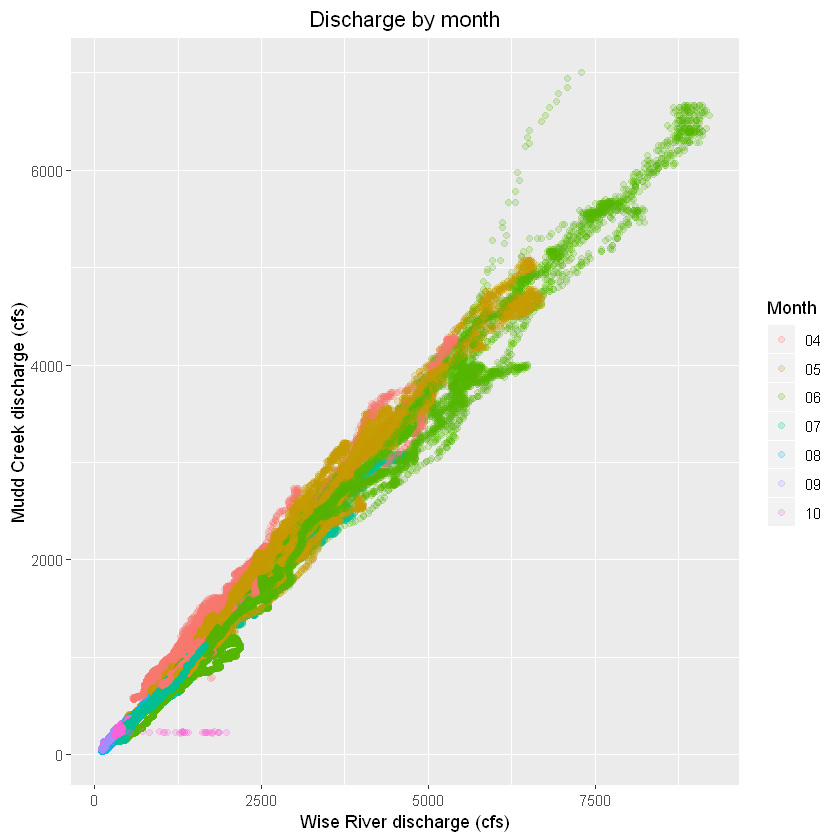

In [111]:
ggplot(data, aes(x = DischargeW, y = DischargeM, color = Month)) + geom_point(alpha = 0.2) +
xlab("Wise River discharge (cfs)") +
ylab("Mudd Creek discharge (cfs)") +
ggtitle("Discharge by month") + theme(plot.title = element_text(hjust = 0.5))

# End of Lab 3